In [81]:
import pandas as pd
df = pd.read_csv("data/space_embedding_data.csv")
df.head()

,Grid,PlaceCount,price,Accommodation,Bar,Cafe,Cultural,Education,Health,Other,...,Health_rating,Other_rating,Outdoors_rating,Restaurant_rating,Retail_rating,Service_rating,Wholesale_rating,positive,negative,review_len
0,L0,8,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,4.020000,0.0,3.942857,0.000000,0.000000,0.000000,0.696000,0.304000,0.536595
1,L1,10,2.000000,0.0,0.0,1.0,0.0,0.0,1.0,3.0,...,5.0,0.000000,0.0,4.777778,0.000000,4.000000,0.000000,0.851852,0.148148,0.802238
2,L10,3,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,4.200000,0.0,0.000000,0.000000,0.000000,0.000000,0.857143,0.142857,0.999095
3,L100,74,2.235294,12.0,6.0,6.0,0.0,1.0,4.0,16.0,...,3.6,4.024460,0.0,3.711172,4.500000,3.028846,0.000000,0.732975,0.267025,0.895548
4,L101,163,1.953488,21.0,19.0,20.0,1.0,1.0,10.0,19.0,...,4.5,4.223132,0.0,3.748855,3.549446,4.311111,3.722222,0.801535,0.198465,0.843739


In [82]:
df.fillna(2, inplace=True)

In [83]:
y = df.drop(["Grid"], axis=1)
X = pd.get_dummies(df.Grid).values

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_tf = sc.fit_transform(y)

# Model building

In [85]:
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
# Parameters
input_neurons = df.Grid.nunique()
output_neurons = df.shape[-1]-1
act_f = 'relu'
hidden_neurons = 2056

# Model architecture
model = Sequential()
model.add(Input(shape=(input_neurons,)))
model.add(Dense(hidden_neurons, activation=act_f))
model.add(Dense(output_neurons, activation=act_f))

In [86]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
model.compile(loss="mean_squared_error", optimizer=opt, metrics=["mean_squared_error"])

batch_size = 12
epochs = 200
history = model.fit(X, y_tf, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/200
40/40 [==============================] - 1s 7ms/step - loss: 1.0018 - mean_squared_error: 1.0018
Epoch 2/200
40/40 [==============================] - 0s 10ms/step - loss: 0.9891 - mean_squared_error: 0.9891
Epoch 3/200
40/40 [==============================] - 0s 11ms/step - loss: 0.9603 - mean_squared_error: 0.9603
Epoch 4/200
40/40 [==============================] - 0s 8ms/step - loss: 0.9572 - mean_squared_error: 0.9572
Epoch 5/200
40/40 [==============================] - 0s 7ms/step - loss: 0.9505 - mean_squared_error: 0.9505
Epoch 6/200
40/40 [==============================] - 0s 8ms/step - loss: 0.9357 - mean_squared_error: 0.9357
Epoch 7/200
40/40 [==============================] - 0s 8ms/step - loss: 0.8984 - mean_squared_error: 0.8984
Epoch 8/200
40/40 [==============================] - 0s 7ms/step - loss: 0.8491 - mean_squared_error: 0.8491
Epoch 9/200
40/40 [==============================] - 0s 7ms/step - loss: 0.8215 - mean_squared_error: 0.8215
Epoch 10/200
40/4

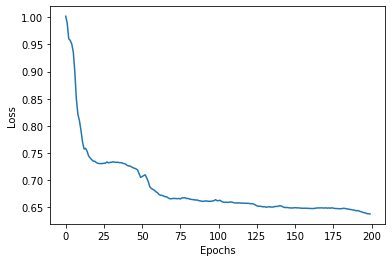

In [87]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history['loss'])
plt.ylabel("Loss")
plt.xlabel("Epochs");

In [88]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X)
mean_squared_error(y_tf, y_pred)

0.638472705533586

In [89]:
model.layers[0].get_weights()

[array([[-0.02708727, -0.01686634, -0.02545001, ..., -0.04540243,
         -0.08878946, -0.03186404],
        [ 0.00727458, -0.04505685, -0.02873553, ...,  0.04335876,
          0.01110888,  0.0111434 ],
        [ 0.02491762, -0.01539987, -0.0502845 , ...,  0.00329315,
         -0.06091722,  0.04480932],
        ...,
        [-0.03073956,  0.04109456, -0.00403168, ...,  0.03033651,
         -0.03881773, -0.02091623],
        [ 0.00521498,  0.00354574, -0.02845488, ...,  0.03373612,
          0.00083938,  0.03638292],
        [-0.01784935,  0.03397395, -0.03219162, ...,  0.04791313,
          0.09388865,  0.03572694]], dtype=float32),
 array([-0.28684935, -0.16035664, -0.47544655, ..., -0.57828254,
        -0.39477527, -0.14340158], dtype=float32)]

Hvad skal laves
- Count af establishments i hver priskategori i stedet for average price for hele grid
- En samlet average rating ikke fordelt på kategorier

Questions for Ioanna
- Can we use the weights from the hidden layer to the output layer?
- How to determine amount of neurons in hidden layer?
    - How to perform cross validation? Evaluate score on full set?